In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
num_atoms

array([13, 16, 19, 22, 25])

In [11]:
25*20.7,13*54.2

(517.5, 704.6)

In [25]:
# ns per day to s per ns
s_per_day = (24*60*60)


array([1594.09594096, 2076.92307692, 2769.23076923, 3428.57142857,
       4173.91304348, 4937.14285714, 5684.21052632])

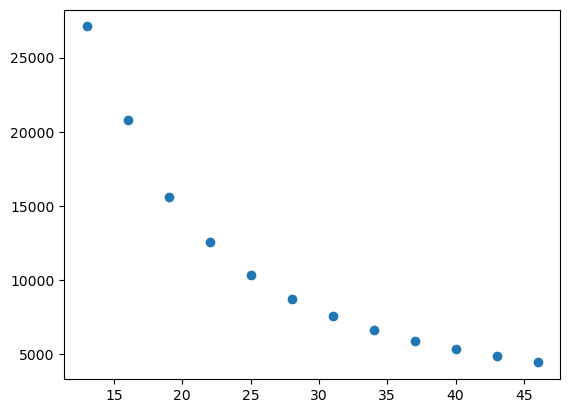

In [97]:
speeds = np.array([54.2,41.6,31.2,25.2,20.7,17.5,15.2,13.3,11.8,10.7,9.72,8.89]) * 500
num_atoms = np.array([13 + 3*i for i in range(len(speeds))])

plt.scatter(num_atoms, speeds)

In [165]:
len("COCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCO") - 5

from rdkit import Chem

mol = Chem.MolFromSmiles("COCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCO")
mol = Chem.AddHs(mol)
mol.GetNumAtoms()

97

In [336]:
len("COCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCO") - 5


48

In [338]:
mol = Chem.MolFromSmiles("COCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCO")
mol = Chem.AddHs(mol)
ExactMolWt(mol)

748.803632568003

In [325]:
from rdkit.Chem.Descriptors import ExactMolWt

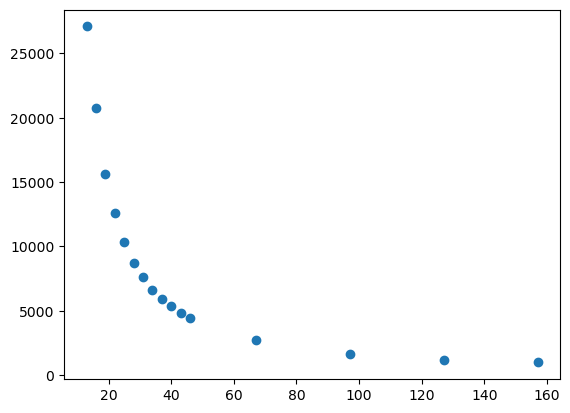

In [335]:
speeds = [54.2,41.6,31.2,25.2,20.7,17.5,15.2,13.3,11.8,10.7,9.72,8.89]
num_atoms = [13 + 3*i for i in range(len(speeds))]


speeds += [5.41,3.27,11.8/5,9.81/5]
num_atoms += [13 + 3*18,13 + 3*28,13 + 3*38, 13+3*48]

speeds = np.array(speeds) * 500
num_atoms = np.array(num_atoms)

plt.scatter(num_atoms, speeds)

In [363]:
loop = "for smiles in "
for i in (num_atoms -13)/3:
    loop += "COCC" + "C"*int(i) + "O "
loop += "; do python run_gnn_multisolvent_simulation.py --smiles $smiles -ns 0.01 -nr 1 -a Speed_benchmark -mfile ../MachineLearning/trained_models/ProductionRun_seed_1612_49_ckpt.pt -sn tip3p; done"
loop

'for smiles in COCCO COCCCO COCCCCO COCCCCCO COCCCCCCO COCCCCCCCO COCCCCCCCCO COCCCCCCCCCO COCCCCCCCCCCO COCCCCCCCCCCCO COCCCCCCCCCCCCO COCCCCCCCCCCCCCO COCCCCCCCCCCCCCCCCCCCCO COCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCO COCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCO COCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCO ; do python run_gnn_multisolvent_simulation.py --smiles $smiles -ns 0.01 -nr 1 -a Speed_benchmark -mfile ../MachineLearning/trained_models/ProductionRun_seed_1612_49_ckpt.pt -sn tip3p; done'

In [367]:
loop = "for smiles in "
for i in (num_atoms -13)/3:
    loop += "COCC" + "C"*int(i) + "O "
loop += "; do tail ${smiles}_in_v_multi_1_Speed_benchmark/${smiles}_in_v_openff200_vacuum_plus_GNN3_vap_0_0_log.txt; done"
loop

'for smiles in COCCO COCCCO COCCCCO COCCCCCO COCCCCCCO COCCCCCCCO COCCCCCCCCO COCCCCCCCCCO COCCCCCCCCCCO COCCCCCCCCCCCO COCCCCCCCCCCCCO COCCCCCCCCCCCCCO COCCCCCCCCCCCCCCCCCCCCO COCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCO COCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCO COCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCO ; do tail ${smiles}_in_v_multi_1_Speed_benchmark/${smiles}_in_v_openff200_vacuum_plus_GNN3_vap_0_0_log.txt; done'

In [330]:
speeds

array([27100., 20800., 15600., 12600., 10350.,  8750.,  7600.,  6650.,
        5900.,  5350.,  4860.,  4445.,  2705.,  1635.,  1180.,   981.])

In [331]:
np.log(num_atoms)

array([2.56494936, 2.77258872, 2.94443898, 3.09104245, 3.21887582,
       3.33220451, 3.4339872 , 3.52636052, 3.61091791, 3.68887945,
       3.76120012, 3.8286414 , 4.20469262, 4.57471098, 4.84418709,
       5.05624581])

In [332]:
num_atoms

array([ 13,  16,  19,  22,  25,  28,  31,  34,  37,  40,  43,  46,  67,
        97, 127, 157])

In [333]:
speeds

array([27100., 20800., 15600., 12600., 10350.,  8750.,  7600.,  6650.,
        5900.,  5350.,  4860.,  4445.,  2705.,  1635.,  1180.,   981.])

In [350]:
plot_folder = "/fileserver/birch/birch1/kpaul/pine8/multi_solvent_pub/manuscript/Plots/"

/tmp/ipykernel_3499163/104391545.py:14: RuntimeWarning: divide by zero encountered in log
  return a*x*np.log(x) + b
/tmp/ipykernel_3499163/104391545.py:14: RuntimeWarning: invalid value encountered in multiply
  return a*x*np.log(x) + b
/tmp/ipykernel_3499163/104391545.py:35: RuntimeWarning: divide by zero encountered in log
  nln_scal = x_scal * np.log(x_scal)
/tmp/ipykernel_3499163/104391545.py:35: RuntimeWarning: invalid value encountered in multiply
  nln_scal = x_scal * np.log(x_scal)


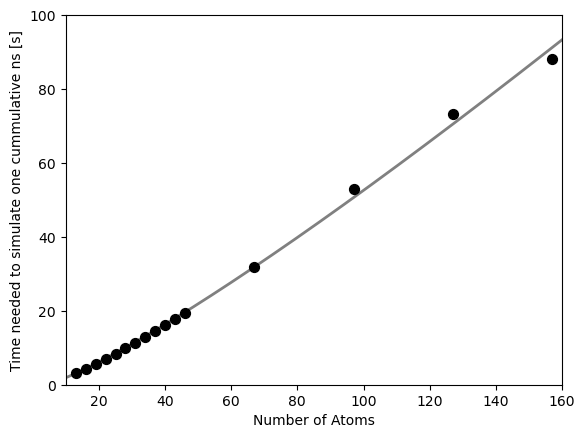

In [353]:
plt.scatter(num_atoms, s_per_day/speeds,marker="o",s=50,c="black")

x_scal = np.arange(0,200,0.1)


# Fit Curves
def linear(x, a, b):
    return a*x + b

def quadratic(x, a, b):
    return a*x**2 + b

def nlogn(x, a, b):
    return a*x*np.log(x) + b

def power(x, a, b,d):
    return a*x**b+d

from scipy.optimize import curve_fit

# popt, pcov = curve_fit(linear, num_atoms, s_per_day/speeds)
# plt.plot(x_scal, linear(x_scal, *popt))

# popt, pcov = curve_fit(quadratic, num_atoms, s_per_day/speeds)
# plt.plot(x_scal, quadratic(x_scal, *popt))

# popt, pcov = curve_fit(power, num_atoms, s_per_day/speeds)
# plt.plot(x_scal, power(x_scal, *popt))

popt, pcov = curve_fit(nlogn, num_atoms, s_per_day/speeds)
plt.plot(x_scal, nlogn(x_scal, *popt),c="grey",zorder=0,linewidth=2,linestyle="-")

q_scal = x_scal**2
l_scal = x_scal
nln_scal = x_scal * np.log(x_scal)

plt.ylim(0, 100)
plt.xlim(10, 160)

plt.ylabel("Time needed to simulate one cummulative ns [s]")
plt.xlabel("Number of Atoms")
plt.savefig(f"{plot_folder}/scaling.pdf",bbox_inches="tight")

### Sinlge Compound Simulation Speed

In [378]:
simulation_speed_single_system = np.array([681,735,717,681,708,629,592,667,667,711,727,669,701,686,653,633]) /10
simulation_speed_single_system

array([68.1, 73.5, 71.7, 68.1, 70.8, 62.9, 59.2, 66.7, 66.7, 71.1, 72.7,
       66.9, 70.1, 68.6, 65.3, 63.3])

/tmp/ipykernel_3499163/2977452194.py:43: RuntimeWarning: divide by zero encountered in log
  nln_scal = x_scal * np.log(x_scal)
/tmp/ipykernel_3499163/2977452194.py:43: RuntimeWarning: invalid value encountered in multiply
  nln_scal = x_scal * np.log(x_scal)


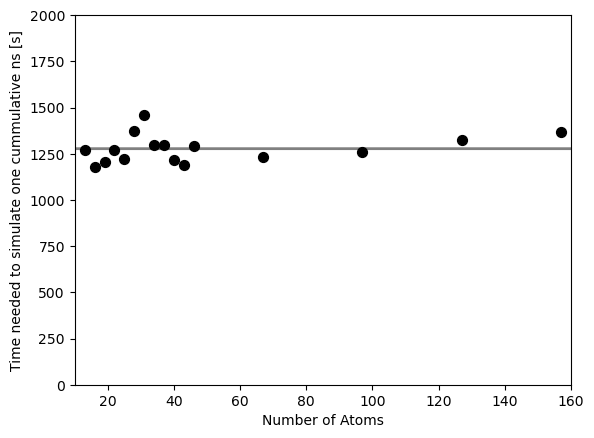

In [382]:
plt.scatter(num_atoms, s_per_day/simulation_speed_single_system,marker="o",s=50,c="black")

x_scal = np.arange(0,200,0.1)


# Fit Curves
def linear(x, a, b):
    return a*x + b

def quadratic(x, a, b):
    return a*x**2 + b

def nlogn(x, a, b):
    return a*x*np.log(x) + b

def power(x, a, b,d):
    return a*x**b+d

def constant(x, a):
    return a + 0*x

from scipy.optimize import curve_fit

# popt, pcov = curve_fit(linear, num_atoms, s_per_day/speeds)
# plt.plot(x_scal, linear(x_scal, *popt))

# popt, pcov = curve_fit(quadratic, num_atoms, s_per_day/speeds)
# plt.plot(x_scal, quadratic(x_scal, *popt))

# popt, pcov = curve_fit(power, num_atoms, s_per_day/speeds)
# plt.plot(x_scal, power(x_scal, *popt))

# popt, pcov = curve_fit(nlogn, num_atoms, s_per_day/simulation_speed_single_system)
# plt.plot(x_scal, nlogn(x_scal, *popt),c="grey",zorder=0,linewidth=2,linestyle="-")

popt, pcov = curve_fit(constant, num_atoms, s_per_day/simulation_speed_single_system)
plt.plot(x_scal, constant(x_scal, *popt),c="grey",zorder=0,linewidth=2,linestyle="-")



q_scal = x_scal**2
l_scal = x_scal
nln_scal = x_scal * np.log(x_scal)

plt.ylim(0, 2000)
plt.xlim(10, 160)

plt.ylabel("Time needed to simulate one cummulative ns [s]")
plt.xlabel("Number of Atoms")
plt.savefig(f"{plot_folder}/scaling_single.pdf",bbox_inches="tight")

In [380]:
popt

array([1277.3285343])

In [365]:
s_per_day/72

1200.0

In [346]:
pcov

array([[ 2.19088570e-06, -4.59440768e-04],
       [-4.59440768e-04,  1.96282348e-01]])

In [280]:
Chem.MolFromSmiles("COCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCO")
mol = Chem.AddHs(mol)
from rdkit.Chem import AllChem
AllChem.EmbedMolecule(mol)
import nglview

view = nglview.show_rdkit(mol)
view

# Get molecular weight
ExactMolWt(mol)

468.4906312880018

In [20]:
len("CCCCCCCCCCCCCCCCCCCC")

20

In [26]:
from rdkit import Chem
import rdkit
mol = Chem.MolFromSmiles("CC.CC")
rdkit.Chem.rdmolops.GetMolFrags(mol,sanitizeFrags=False,asMols=True)

(<rdkit.Chem.rdchem.Mol at 0x7fa788fe4ba0>,
 <rdkit.Chem.rdchem.Mol at 0x7fa788fe42e0>)

In [29]:
from GNNImplicitSolvent import minimize_mol, calculate_entropy
from rdkit import Chem
from rdkit.Chem import AllChem

mol = Chem.MolFromSmiles('COCCO')
mol = Chem.AddHs(mol)
AllChem.EmbedMultipleConfs(mol, numConfs=128)

out = minimize_mol(mol,"DMSO",return_gnn_sim=True,return_traj=True)

Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
Platform:  GPU  ready
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:05<00:00,  5.30s/it]
